## Ridge Classifier

Ridge regression is an extension to least squares which introduces an additional regularization parameter $\lambda \geq 0$. As such, the loss is given by:

\begin{align*}
    J_{\mathrm{Ridge}}(\textbf{w}) = \|X\textbf{w} - y\|^2 + \lambda \|\textbf{w}\|^2.
\end{align*}
The regularization parameter $\lambda$ is tasked to control the *generalization* to unseen data.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import linear_model, svm

plt.rcParams.update({
    "text.usetex": True
})

2023-02-27 04:16:18.961062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
img_height = 256
img_width = 256
image_dir = "images"
batch_size = None

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    labels="inferred",
    class_names=["Austria","Australia"],
    subset="both",
    seed = 0,
    batch_size = batch_size,
    crop_to_aspect_ratio=True,
    image_size=(img_height, img_width))


Found 14742 files belonging to 2 classes.
Using 11794 files for training.
Using 2948 files for validation.


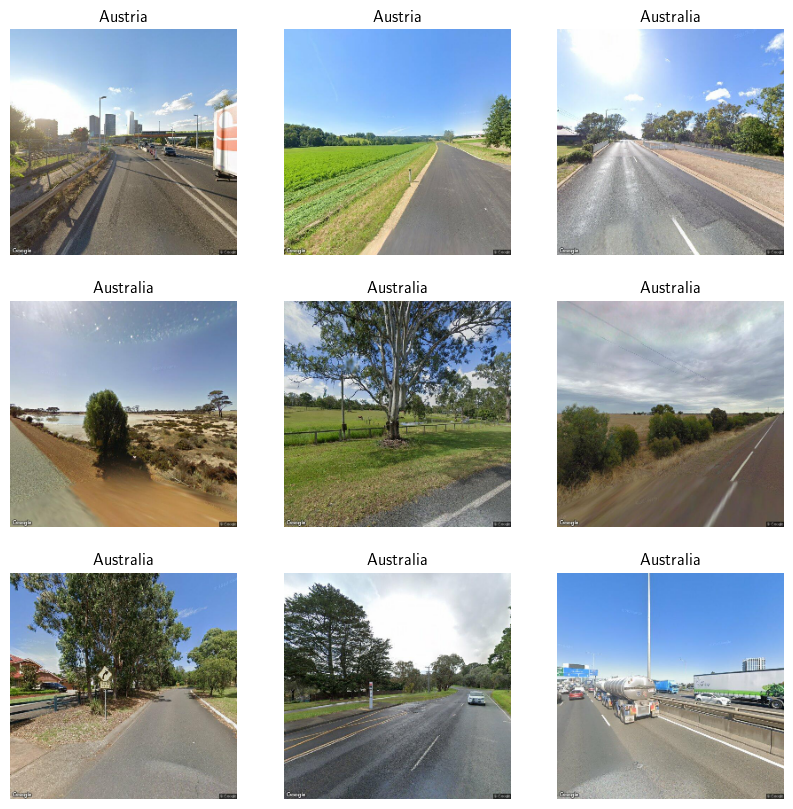

In [5]:
plt.figure(figsize=(10, 10))
i = 1
for image, label in train_ds.take(9):
  ax = plt.subplot(3, 3, i)
  plt.imshow(image.numpy().astype("uint8"))
  plt.title(train_ds.class_names[label])
  plt.axis("off")
  i += 1
plt.show()

In [6]:
def sample_data(ds, sample_size, normalize = True):
     # Generate fresh training samples
    sample = ds.take(sample_size)
    images = np.array([x for (x, y) in sample.as_numpy_iterator()]).reshape((sample_size,-1))
    if normalize:
        images = images/255
    labels = np.array([y for (x, y) in sample.as_numpy_iterator()])
    return images, labels


def calculate_accuracy(regressor, images, labels):
    predicted_labels = regressor.predict(images)
    prediction_results = (predicted_labels == labels)
    print(f"{sum(prediction_results)} out of {len(prediction_results)} correctly classified.")
    return sum(prediction_results)/len(prediction_results)

def evaluate_regressor(regressor, sample_size, normalize = True):
    
    train_images, train_labels = sample_data(train_ds, sample_size, normalize)
    val_images, val_labels = sample_data(val_ds, sample_size, normalize)
    
    # Fit the regressor
    regressor.fit(train_images, train_labels)
    
    # Calculate the accuracy on the training data
    print("Training data:")
    train_accuracy = calculate_accuracy(regressor, train_images, train_labels)
    
    # Calculate the accuracy on the validation data
    print("Validation data:")
    val_accuracy = calculate_accuracy(regressor, val_images, val_labels)
    return train_accuracy, val_accuracy

def plot_accuracy(accuracy_array, title = None):
    mean = accuracy_array.mean(axis = 0)
    std = accuracy_array.std(axis = 0)
    xlabels = ["Training accuracy", "Validation accuracy"]
    plt.bar(xlabels, mean, yerr = std, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.axhline(0.5, linestyle = "dotted", color = "black")
    plt.title(title)
    plt.show()

Training data:
500 out of 500 correctly classified.
Validation data:
266 out of 500 correctly classified.
Training data:
500 out of 500 correctly classified.
Validation data:
258 out of 500 correctly classified.
Training data:
500 out of 500 correctly classified.
Validation data:
267 out of 500 correctly classified.
Training data:
500 out of 500 correctly classified.
Validation data:
235 out of 500 correctly classified.
Training data:
500 out of 500 correctly classified.
Validation data:
236 out of 500 correctly classified.


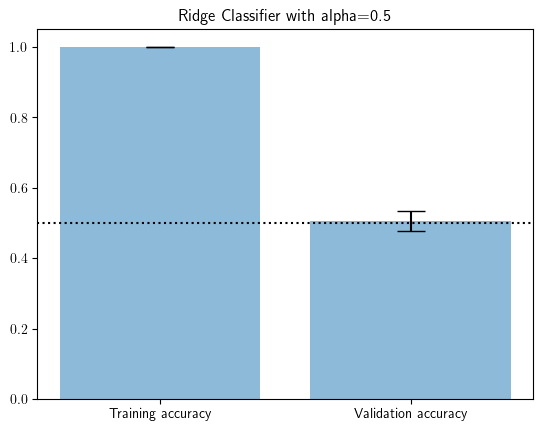

In [8]:
alpha = 0.5
sample_size = 500
ridge_classifier = linear_model.RidgeClassifier(alpha = alpha)
ridge_accuracy_array = np.empty((5,2))
for i in range(5):
    train_accuracy, val_accuracy = evaluate_regressor(ridge_classifier, sample_size)
    ridge_accuracy_array[i] = np.array([train_accuracy, val_accuracy])
plot_accuracy(ridge_accuracy_array, f'Ridge Classifier with {alpha=}')

In [89]:
sample_size = 1500

ridge_regressor = linear_model.RidgeClassifierCV(alphas = [0.1,1,10])
train_images, train_labels = sample_data(train_ds, sample_size)
val_images, val_labels = sample_data(val_ds, sample_size)
    
# Fit the regressor
ridge_regressor.fit(train_images, train_labels)
print(ridge_regressor.alpha_, ridge_regressor.best_score_)
print(ridge_regressor.score(train_images, train_labels))
print(ridge_regressor.score(val_images, val_labels))

10.0 -1.4343955009915856
1.0
0.492


In [10]:
C = 1
sample_size = 500
logistic_regressor = linear_model.LogisticRegression(C = C)
logistic_accuracy_array = np.empty((5,2))
for i in range(5):
    train_accuracy, val_accuracy = evaluate_regressor(logistic_regressor, sample_size)
    logistic_accuracy_array[i] = np.array([train_accuracy, val_accuracy])

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data:
500 out of 500 correctly classified.
Validation data:
266 out of 500 correctly classified.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data:
500 out of 500 correctly classified.
Validation data:
255 out of 500 correctly classified.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data:
500 out of 500 correctly classified.
Validation data:
261 out of 500 correctly classified.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data:
500 out of 500 correctly classified.
Validation data:
267 out of 500 correctly classified.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data:
500 out of 500 correctly classified.
Validation data:
260 out of 500 correctly classified.


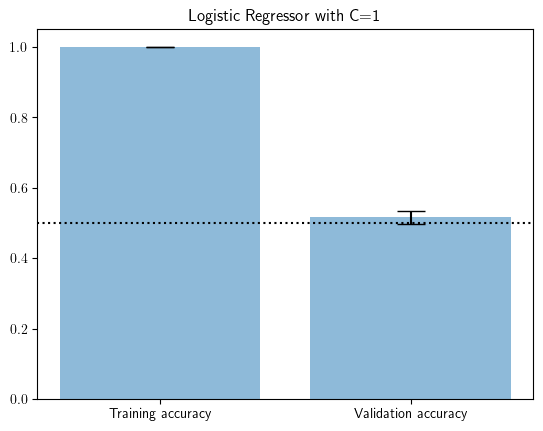

In [91]:
plot_accuracy(logistic_accuracy_array, f'Logistic Regressor with {C=}')

Training data:
250 out of 250 correctly classified.
Validation data:
136 out of 250 correctly classified.
Training data:
250 out of 250 correctly classified.
Validation data:
120 out of 250 correctly classified.
Training data:
250 out of 250 correctly classified.
Validation data:
130 out of 250 correctly classified.
Training data:
250 out of 250 correctly classified.
Validation data:
107 out of 250 correctly classified.
Training data:
250 out of 250 correctly classified.
Validation data:
167 out of 250 correctly classified.


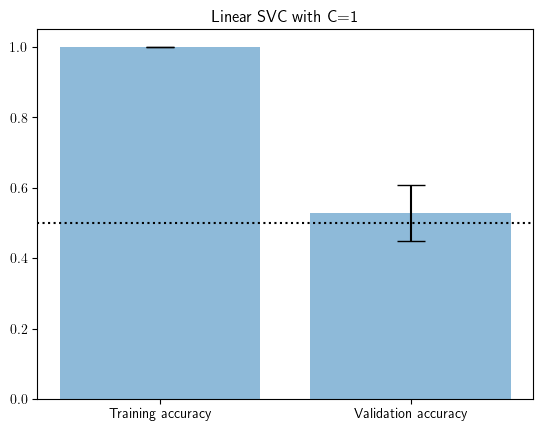

In [14]:
sample_size = 250
svc_linear = svm.SVC(kernel = "linear")
svc_linear_accuracy_array = np.empty((5,2))
for i in range(5):
    train_accuracy, val_accuracy = evaluate_regressor(svc_linear, sample_size)
    svc_linear_accuracy_array[i] = np.array([train_accuracy, val_accuracy])
plot_accuracy(svc_linear_accuracy_array, f'Linear SVC with {C=}')

Training data:
408 out of 500 correctly classified.
Validation data:
197 out of 500 correctly classified.
Training data:
410 out of 500 correctly classified.
Validation data:
256 out of 500 correctly classified.
Training data:
415 out of 500 correctly classified.
Validation data:
316 out of 500 correctly classified.
Training data:
429 out of 500 correctly classified.
Validation data:
274 out of 500 correctly classified.
Training data:
420 out of 500 correctly classified.
Validation data:
186 out of 500 correctly classified.


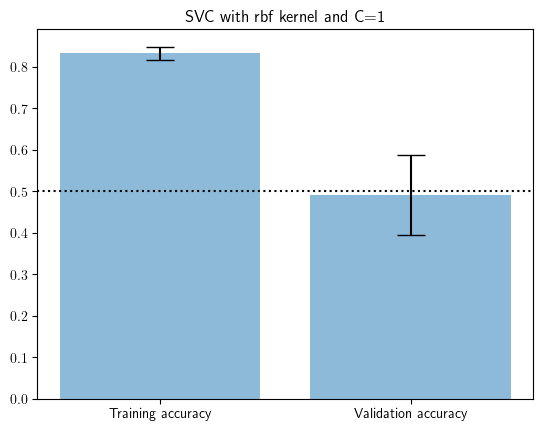

In [15]:
sample_size = 500
svc_rbf = svm.SVC(kernel = "rbf")
svc_rbf_accuracy_array = np.empty((5,2))
for i in range(5):
    train_accuracy, val_accuracy = evaluate_regressor(svc_rbf, sample_size)
    svc_rbf_accuracy_array[i] = np.array([train_accuracy, val_accuracy])
plot_accuracy(svc_rbf_accuracy_array, f'SVC with rbf kernel and {C=}')